# Erstellung von Graphiken mit Matplotlib

## Auftrag
Erstellen Sie eine Beispielsammlung von verschiedenen Arten von Graphiken mit Matplotlib; es sollte je ein Beispiel der folgenden Diagrammtypen berücksichtigt werden:
1. Funktionsgraphen, 
2. Mehrere Funktionsgraphen in der selben Graphik,
3. Balkendiagramme,
4. Tortendiagramme,
5. Histogramme.

## Umgebung
Damit die Snippets funktionieren, müssen die folgenden Python-Module installiert sein:
* numpy
* matplotlib
* scipy

> Die jeweilgen Importe sind nur in den ersten Snippets aufgeführt, da die einzelnen Sippets aufeinander aufbauen.

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


### NumPy
Bei **NumPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht eine einfache Handhabung von grossen mehrdimensionalen Arrays. Dazu bietet **NumPy** effiziente Implementierungen von mathematischen Funktionen *(NumPy, 2019)*. 

###  Matplotlib
Bei **Matplotlib** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. **Matplotlib** ermöglicht eine graphische Darstellung sämtlicher mathematischen Funktionen und vielem mehr. Die erstellten Graphen können mit wenig Aufwand so konfiguriert werden, sodass sie für fast alle Anwendungsbereiche geeignet sind *(Matplotlib, 2019)*. 

### SciPy
Bei **SciPy** handelt es sich um eine Programmbibliothek für die Programmiersprache Python. Diese Bibliothek ermöglicht es auf einfache Weise statistische Standardwerte zu generieren und noch vieles mehr *(SciPy, 2019)*.

## Funktionsgraphen

### Einfacher Funktionsgraph
Für den Auftrag **1 Funktionsgraphen** wurde die Allgemeine Normalverteilung (Gauss-Verteilung) ausgewählt. Bei der Normalverteilung handelt es sich in der Statistik um eine der am häufigsten verwendeten Verteilungsfunktionen. Das kommt daher, dass sich mit dieser Funktion viele technische, wirtschaftliche und naturwissenschaftliche Abhängigkeiten beschreiben lassen. Die Normalverteilung besitzt die bekannte Glockenkurve, deren Verlauf über zwei Parameter $\mu$ (Mittelwerts) und $\sigma^2$ (Variaz) gesteuert wird. Die Wurzel von $\sigma^2$ ergibt die Standardabweichung, welche mit $\sigma$ gekenzeichnet wird *(Bärtl, August 2017)*.  

$$f(x;\mu,\sigma^2)=\frac{1}{\sigma\sqrt{2\pi}}*e^-\frac{1}{2}(\frac{x-\mu}{\sigma})^2$$  
Der Parameter $\mu$ (`mu`) gibt den Erwartungswert an. Dieser legt fest, an welcher Stelle die Normalvertilung ihr Maximum haben wird. Der zweite Parameter $\sigma$ (`sigma`) gibt die Standardabweichung an.
* $\mu$ verschiebt den Mittelwert auf der X-Achse
* $\sigma$ lässt die Glockenkurve stärker/schwächer ausfallen  

In [4]:
import scipy.stats


def normalPDF(x, mu, sigma):
    """ Erstellt eine Normalverteilung als Wahrscheinlichkeitsdichtefunktion
        :param array x: Daten
        :param float mu: Mittelwert
        :param float sigma: Standartabweichung
        :retrun x, y: Berechnete Daten für die X- und Y-Achse
    """
    if sigma <= 0: 
        raise ValueError('sigma darf nicht <= 0 sein.')
    
    y = scipy.stats.norm.pdf(x, mu, sigma)
    return x, y

Die Funktion `normalPDF` generiert mithilfe der Programmbibliothek **SciPy** eine Normalverteilung als Wahrscheinlichkeitsdichtefuntkion an hand der Daten, die mit dem Parameter `x` übergeben werden. Wie auch die Normalverteilung benötigt die Funktion `normalPDF` zwei Parameter `mu` für die Bestimmung des Mittelwert und `sigma` für die Bestimmung der Standardabweichung respektive für die Varianz *(SciPy, 2019)*. 

Mittels **Matplotlib** ist es sehr einfach einen Funktionsgraph zu erstellen. Dazu wird nur der Import der Programmbibliothek und die zwei Zeilen `plt.plot(x, y)` und `plt.show()` benötigt. Wobei bei den Parameter `x` und `y` die entsprechenden Daten als Array vorhanden sein müssen. Diese Daten werden über die zuvor beschriebene Funktion `normalPDF` generiert. Der restliche Programmcode ist selbstprechend und ist dafür da, um den Graph lesbarer und informationsreicher zu gestallten.
Folgende Liste beschreibt, was im untenstehenden Graphen konfiguriert wurde: 
* `xlabel`: Wird die X-Achse beschrieben
* `ylabel`: Wird die Y-Achse beschrieben
* `title`: Wird ein Titel für den Graphen gesetzt
* `grid`: Wird festgelegt ob das Gitter im Hintergrund dargestellt werden soll  

Dies ist nur eine Auswahl einer Vielzahl von möglichen Konfigurationen, die mittels **Matplotlib** gemacht werden können *(Matplotlib, 2019)*.

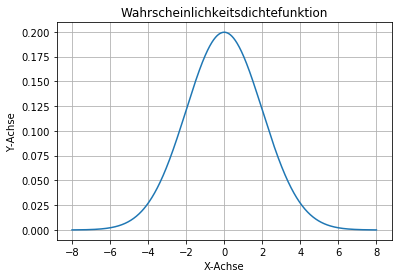

In [5]:
import matplotlib.pyplot as plt
import numpy as np


# Datengenerierung zwsichen -8.0 und 8.0
daten = np.linspace(-8.0, 8.0, 1000)

plt.title('Wahrscheinlichkeitsdichtefunktion')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)

mu, sigma = 0.0, 2.0
x, y = normalPDF(daten, mu, sigma)
plt.plot(x, y)

plt.show()

### Mehrere Funktionen in derselben Grafik
Die Dahrstellung von mehreren Funktionen in derselben Grafik kann ebenfalls mit der `plot`-Funktion der **Matplotlib** erstellt werden. Dies durch mehrfaches Aufrufen der `plot`-Funktion mit den entsprechenden Parametern. Damit ersichtlich ist, welcher Graph welche Funktion abbildet, kann mittels der `legend`-Funktion eine Legende hinzugefügt werden.

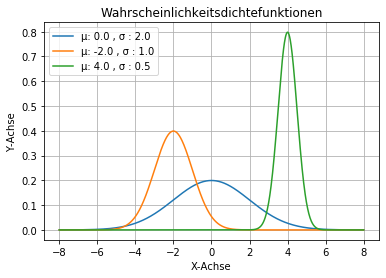

In [6]:
# Datengenerierung zwsichen -8.0 und 8.0
daten = np.linspace(-8.0, 8.0, 1000)

plt.title('Wahrscheinlichkeitsdichtefunktionen')
plt.xlabel('X-Achse')
plt.ylabel('Y-Achse')
plt.grid(True)

mu_simga = [(0.0, 2.0), (-2.0, 1.0), (4.0, 0.5)]
for mu, sigma in mu_simga:
    x, y = normalPDF(daten, mu, sigma)
    plt.plot(x, y, label=f'\u03BC: {mu} , \u03C3 : {sigma}')

plt.legend()
plt.show()

### Mehrere Funktionen in eigener Grafik als Subplot
Ähnlich wie bei einer Dahrstellung von mehreren Funktionen in derselben Grafik können die Funktionen auch in eigenen Grafiken mit sogenannten Subplots dargestllt werden. Dazu kann vor dem Plotten mittels `subplot(row, column, index)` angegeben werden, aus wie vielen Zeilen (`row`) und Spalten (`column`) die Grafik besteht. Mittels dem dirtten Paramter `index` kann die genaue Stelle im Raster angegeben werden. Zusätzlich kann die Farbe und die Form der **Verteilungsfunktion** im `plot`-Befehl mit dem dritten Paramter `r-` definiert werden. Dabei steht `r` für die Farbe *red* und `-` für die Form. Für die Darstellung der Linen gibt es mehrere Formen. Untenstehend sind einige Möglichkeiten aufgeführt:
* `r^`: Rote Dreiecke
* `g.`: Grüne Punkte
* `b+`: Blaue Dreiecke

Es gibt mehrere Arten wie die Farbe und die Form der Funktion verändert werden kann. Oben ist eine der Arten aufgeführt.

Da nun die einzlenen Normalverteilungen in einzelnen Graphen dargestellt werden, wird zusätzlich in den Graph noch die Verteilungsfunktion eingezeichnet. Die Verteilungsfunktikon wird über die Funktion `normalCDF` generiert. Diese folgt dem gleichen Schema wie die `normalPDF`. Die Verteilungsfunktion beantwortet die Frage: "Mit welcher Wahrscheinlichkeit nimmt $X_N$ höchstens den Wert x an?". Die Verteilungsfunktion lautet für die Normalverteilung wie folgt *(Bärtl, August 2017)*:  
$$F_N(x|\mu,\sigma)=\int_{-\infty}^{x} \frac{1}{\sigma\sqrt{2\pi}}e^-\frac{1}{2}(\frac{u-\mu}{\sigma})^2$$

In [7]:
def normalCDF(x, mu, sigma):
    """  Erstellt eine Normalverteilung als Verteilungsfunktion
        :param array x: Daten
        :param float mu: Mittelwert
        :param float sigma: Standartabweichung
        :retrun x, y: Berechneten Daten für die X- und Y-Achse
    """
    if sigma <= 0: 
        raise ValueError('sigma darf nicht <= 0 sein.')
    
    y = scipy.stats.norm.cdf(x, mu, sigma)
    return x, y 

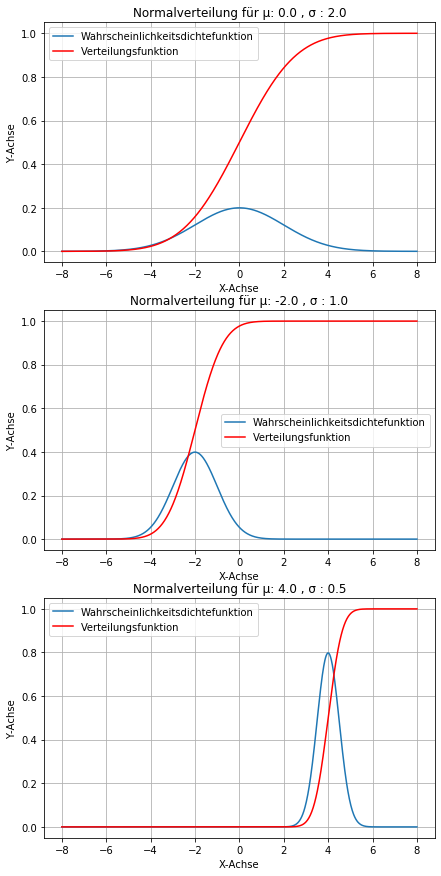

In [8]:
# Datengenerierung zwsichen -8.0 und 8.0
daten = np.linspace(-8.0, 8.0, 1000)

plt.figure(figsize=(7,15))

mu_simga = [(0.0, 2.0), (-2.0, 1.0), (4.0, 0.5)]
for i, values in enumerate(mu_simga, start=1):

    mu, sigma = values[0], values[1]

    plt.subplot(3, 1, i)
    plt.title(f'Normalverteilung für \u03BC: {mu} , \u03C3 : {sigma}')
    plt.xlabel('X-Achse')
    plt.ylabel('Y-Achse')
    plt.grid(True)
    
    x, y = normalPDF(daten, mu, sigma)
    plt.plot(x, y, label='Wahrscheinlichkeitsdichtefunktion')
    x, y = normalCDF(daten, mu, sigma)
    plt.plot(x, y, "r-", label=f'Verteilungsfunktion')
    plt.legend()
    

plt.show()

## Balkendiagramme
Ein Balkendiagramm eignet sich gut für diskrete Merkmale. In der Praxis bedeutet dies meist, dass es nur abzählbar viele Ausprägungen annehemen kann, es jedoch trotzdem endliche Ausprägungen gibt. Beispiele hier für wären Haarfarbe, Geschlecht oder Teilnehmer einer Veranstalltung. Obwohl es beispielweise endliche Ausprägungen von Haarfarben gibt, werden sich in der Praxis die Umfragenergebniss bei Haarfarben in einem abzählbaren Rahmen befinden.  
Ein Balkendiagramm zeigt auf der X-Achse die verschiedenen Ausprägungen der Merkmale. Die Länge der Balken gibt die jeweilige Häufigkeit proportional zu den anderen Balken an. Dabei kann es sich hier um die absolute oder relative Häufigkeit handeln.  
Für das folgende Balkendiagramm wurde ein kompletter Doppelwurf eines Wüfels simuliert und jeweils die erste Augenzahl $a_1$ mit der zweiten $a_2$ Augenzahl addiert. Dadurch entstehen Ausprägungen von $2$ bis $12$. 

$$Doppelwurf = \{(1,1),(1,2),...,(1,6),(2,1),(2,6),(6,6)\}$$  

Die Währscheinlichkeiten der möglichen Ausprägungen lauten also wie folgt:  

|$x$|2|3|4|5|6|7|8|9|10|11|12|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|$f(x)$|$\frac{1}{36}$|$\frac{1}{18}$|$\frac{1}{12}$|$\frac{1}{9}$|$\frac{5}{36}$|$\frac{1}{6}$|$\frac{5}{36}$|$\frac{1}{9}$|$\frac{1}{12}$|$\frac{1}{18}$|$\frac{1}{36}$|  

Die Funktion `doppelwurfDatenGenerieren` erstellt die oben aufgeführten Doppelwurfergebnisse, zählt die Augenzahlen zusammen und berechnet die relative Häufigkeit.

In [9]:
import collections
import itertools


def doppelwurfDatenGenerieren():
    """ Simuliert ein kompletter Doppelwurf
        :return x, y: Berechneten Daten für die X- und Y-Achse
    """
    # Kompletter simulierter Doppelwurf
    merkmale = [i + j for i, j in itertools.product(range(1,7), range(1,7))]

    values = collections.Counter(merkmale)

    x, y = [], []
    for key, value in values.items():
        x.append(key)
        y.append(value/len(merkmale)) # Relative Häufigkeit
        
    return x, y

Im darauffolgenden Programm wird genau das obige Szenario durchgeführt und daraus ein Balkendiagramm erstellt. Auch ihr ergibt sich die von der Normalverteilung her bekannte Glockenform. Der Erwartungswert von $x$ ergibt sich aus den Ausprägungen $x_k$ und den dazu gehörenden Wahrscheinlichkeiten $f(x_k)$ *(Bärtl, August 2017)*.

$$E(X)=\sum\nolimits_{k=1}^{11} x_k*f(x_k)=2*\frac{1}{36}+3*\frac{1}{18}+...+12*\frac{1}{36}=7$$

Zusätzlich zum Balkendiagramm wurde dazu noch die Verteilungsfunktion des Doppelwurs mittels einem `subplot` hinzugefügt. Das Balkendiagramm lässt sich mittels der Funktion `bar` der **Matplotlib** erstellen.  
Spannender ist das Stufendiagramm welches für die Verteilungsfunktion $F(x)$ verwendet wurde. Dieses lässt sich mittels der `step` Funktion erstellen. Zusätzlich kann hier angegeben werden, wo sich die Schneidepunkte der Schritte mit einer allfälligen weiteren Funktion befinden. Im unteren Programmcode wurde dies über den Parameter `where` und dem Werte `'post'` angegeben. Über den Parameter `alpha` kann die Deckkraft der Line bestimmt werden *(Matplotlib, 2019)*.  

* `post`: Schrittstart
* `mid`: Schrittmitte
* `pre`: Schrittende  

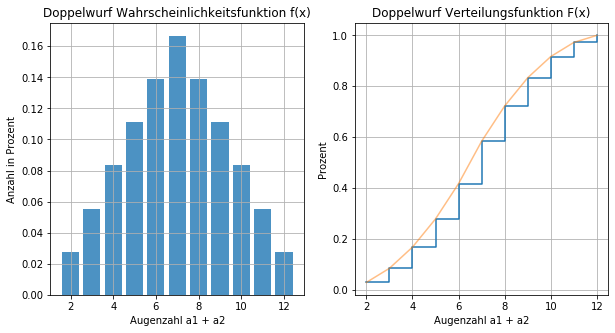

In [10]:
x, y = doppelwurfDatenGenerieren()
    
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

plt.title('Doppelwurf Wahrscheinlichkeitsfunktion f(x)')
plt.xlabel('Augenzahl a1 + a2')
plt.ylabel('Anzahl in Prozent')
plt.grid(True)
plt.bar(x, y, alpha=0.8)


# Relative Empirische Verteilungsfunktion
y2 = list()
for index, value in enumerate(y):
    if index == 0:
        y2.append(value)
    else:
        y2.append(value + y2[index - 1])

plt.subplot(1, 2, 2)
plt.title('Doppelwurf Verteilungsfunktion F(x)')
plt.xlabel('Augenzahl a1 + a2')
plt.ylabel('Prozent')
plt.grid(True)
plt.step(x, y2, where='post')
plt.plot(x, y2, alpha=0.5)

plt.show()

## Tortendiagramme
Als Datenbasis für das Tortendiagramm wurden die gleichen Daten wie bei den Balkendiagrammen verwendet. Die Darstellung des Tortendiagramms kann mittels `pie`-Funktion der **Matplotlib** Programmierbibliothek erstellt werden. Als Parameter können Bezeichnungen sowie ensptrechende Werte mitgegeben werden. Bei diesem Beispiel wurde zusätzlich der Parameter `colors` mitgegeben, der die Farbe der Schnitte bestimmt, der Parameter `shadow`, der der Grafik eine leichte Schatteneffekt gibt, sowie der `explode`-Parameter, der den Teil des Erwartungswerts abdockt. Zudem wurde mittels dem Parameter `startangle` das Tortendiagramm um 90-Grad gedreht.  
Unter dem [folgenden Link](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) sind alle Farben aufgeführt, welche für die Diagramme verwendet werden können *(Matplotlib, 2019)*.

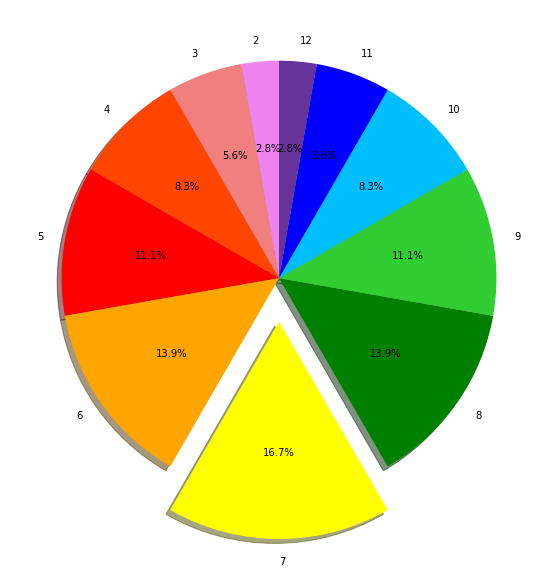

In [11]:
x, y = doppelwurfDatenGenerieren()

# Grösse definieren
plt.figure(figsize=(10,10))

explode = (0,0,0,0,0,0.2,0,0,0,0,0)
colors = ['violet', 'lightcoral', 'orangered', 'red', 'orange', 'yellow', 'green', 'limegreen', 'deepskyblue', 'blue', 'rebeccapurple']
plt.pie(y, explode=explode, labels=x, autopct='%1.1f%%' , shadow=True, colors=colors, startangle=90)

plt.show()

> Nun ist auch graphisch aufgezeigt, bei welcher Zahl beim Brettspiel Catan, am meisten Ressourcen erbäutet werden können.

## Histogramme
Für das Histogramm wierd wider eine Normalverteilung genneriert, dieses mal jedoch ohne die Hilfe von **SciPy**. **Numpy** bietet auch eine Möglichkeit normalisierte Daten zu generieren. Dies kann über die Funktion `random.normal` geschehen. Die Daten können mittels **Matplotlib** und der Funktion `hist` als Histogramm geplottet werden. Über den zweiten Parameter wird gesteuert, wieviele Schnitte dargestellt werden sollen.  
Im zweiten Teil wird die Wahrscheinlichkeitsdichtefunktion anhand des zuvor erstellen Histogrammes berechnet. Die Formel dazu ist im Kapitel Funktionsdiagramm aufgeführt *(NumPy, 2019)*.

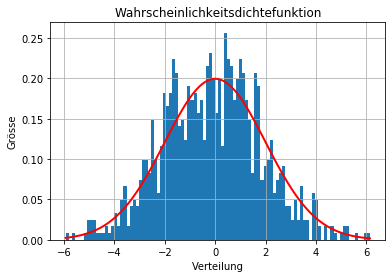

In [12]:
mu, sigma = 0.0, 2.0

# Daten generieren
normal = np.random.normal(mu, sigma, 1000)

plt.title('Wahrscheinlichkeitsdichtefunktion')
plt.xlabel('Verteilung')
plt.ylabel('Grösse')
plt.grid(True)

count, bins, ignored = plt.hist(normal, 100, density=True)

#Berechnung der Wahrscheinlichkeitsdichtefunktion
y = 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(bins - mu)**2 / (2 * sigma**2))

plt.plot(bins, y, "r", linewidth=2)

plt.show()


## Fazit
**Maplotlib** erscheint gegen aussen als einfachge Programmbibliothek, welche einfache Grafiken erzeugen kann. Jedoch stimmt dies nur teilweise. Mittels dieser Programmierbibliothek können zwar schnell Grafiken erzeugt werden, jedoch ist es auch möglich komplexe Grafiken zu erzeugen. Dazugehören zum Beispiel 3D-Grafiken, welche bei dieser Arbeit nicht konkrett behandelt wurden. Zudem ist es möglich mit wenigen Konfigurationen die Grafiken so zu gestallten, dass diese direkt für Präsentationen verwendet werden können.

## Litaraturverzeichnis
NumPy Developers. (2019). *NumPy*. Abgerufen am 16.03.2020 von https://numpy.org/  
Matplotlib. (2019). *Matplotlib*. Abgerufen am 16.03.2020 von https://matplotlib.org/  
SciPy. (2019). *SciPy*. Abgerufen am 16.03.2020 von https://www.scipy.org/  
Brätl, M. (August 2017). *Statistik Schritt für Schritt*  